In [91]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor



In [2]:
df=pd.read_csv(r'C:\Users\kogla\OneDrive\Masaüstü\SWE599\merged.csv').drop("Unnamed: 0", axis=1)
df.head()

,company,departure_airport,arrival_airport,departure_time,arrival_time,departure_date,price_try,departure_week_day,checked_week_day,departure_day,departure_month,remaining_day_to_flight,arrival_city,departure_airport_name,departure_hour,part_of_day,is_weekend,part_of_month,duration(min)
0,AnadoluJet,SAW,ADB,07:30:00,08:40:00,2022-11-14,506.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,7,Early Morning,Weekday,Middle,70
1,AnadoluJet,SAW,ADB,09:20:00,10:30:00,2022-11-14,506.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,9,Morning,Weekday,Middle,70
2,AnadoluJet,SAW,ADB,20:55:00,22:05:00,2022-11-14,506.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,20,Evening,Weekday,Middle,70
3,Pegasus,SAW,ADB,23:35:00,00:45:00,2022-11-14,539.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,23,Night,Weekday,Middle,70
4,Pegasus,SAW,ADB,09:10:00,10:20:00,2022-11-14,542.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,9,Morning,Weekday,Middle,70


In [3]:
df=df.drop(['departure_airport', 'arrival_airport', 'departure_date','departure_time', 'arrival_time'], axis=1)

In [4]:
df['company'] = df.company.astype('category')
df['departure_airport_name'] = df.departure_airport_name.astype('category')
df['arrival_city'] = df.arrival_city.astype('category')
df['part_of_day'] = df.part_of_day.astype('category')
df['departure_week_day'] = df.departure_week_day.astype('category')
df['part_of_month'] = df.part_of_month.astype('category')
df['is_weekend'] = df.is_weekend.astype('category')
df['checked_week_day'] = df.checked_week_day.astype('category')
df["price_try"] = df["price_try"].astype("int64")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129513 entries, 0 to 129512
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   company                  129513 non-null  category
 1   price_try                129513 non-null  int64   
 2   departure_week_day       129513 non-null  category
 3   checked_week_day         129513 non-null  category
 4   departure_day            129513 non-null  int64   
 5   departure_month          129513 non-null  int64   
 6   remaining_day_to_flight  129513 non-null  int64   
 7   arrival_city             129513 non-null  category
 8   departure_airport_name   129513 non-null  category
 9   departure_hour           129513 non-null  int64   
 10  part_of_day              129513 non-null  category
 11  is_weekend               129513 non-null  category
 12  part_of_month            129513 non-null  category
 13  duration(min)            129513 non-null  in

In [5]:
df.head()

,company,price_try,departure_week_day,checked_week_day,departure_day,departure_month,remaining_day_to_flight,arrival_city,departure_airport_name,departure_hour,part_of_day,is_weekend,part_of_month,duration(min)
0,AnadoluJet,506,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,7,Early Morning,Weekday,Middle,70
1,AnadoluJet,506,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,9,Morning,Weekday,Middle,70
2,AnadoluJet,506,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,20,Evening,Weekday,Middle,70
3,Pegasus,539,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,23,Night,Weekday,Middle,70
4,Pegasus,542,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,9,Morning,Weekday,Middle,70


In [6]:
df["price_try"].describe()

count    129513.000000
mean        874.649935
std         286.457553
min         432.000000
25%         734.000000
50%         869.000000
75%        1006.000000
max        4258.000000
Name: price_try, dtype: float64

In [7]:
categorical_cols = df.select_dtypes(include=['category']).columns.to_list()

In [8]:
dummies_data = pd.get_dummies(df[categorical_cols])
df_updated = pd.concat([df.drop(categorical_cols, axis=1), dummies_data], axis=1)

In [9]:
df_updated.head()

,price_try,departure_day,departure_month,remaining_day_to_flight,departure_hour,duration(min),company_AnadoluJet,company_Pegasus,company_Türk Hava Yolları,departure_week_day_Friday,...,part_of_day_Evening,part_of_day_Late Night,part_of_day_Morning,part_of_day_Night,part_of_day_Noon,is_weekend_Weekday,is_weekend_Weekend,part_of_month_Beginning,part_of_month_End,part_of_month_Middle
0,506,14,11,13,7,70,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,506,14,11,13,9,70,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,506,14,11,13,20,70,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,539,14,11,13,23,70,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
4,542,14,11,13,9,70,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [10]:
df_updated.shape[0]

129513

In [11]:
X = df_updated.drop(['price_try'], axis=1)

y = df_updated['price_try']

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

In [106]:
predicted_df.original_values.describe()

count    25903.000000
mean       871.957727
std        283.426099
min        432.000000
25%        732.000000
50%        869.000000
75%       1006.000000
max       4258.000000
Name: original_values, dtype: float64

In [110]:
def categorize(row):
    if row <= 732:
        return "432-732"
    elif row <= 869:
        return "733-869"
    elif row <= 1006:
        return "870-1006"
    else:
        return "1007-4258"

In [129]:
model_comparison={}

## MACHINE LEARNING ALGORITHMS

### 1) KNN Regressor

In [16]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv = 10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [17]:
knn_regressor.best_params_

{'n_neighbors': 4}

In [18]:
y_train_pred =knn_regressor.predict(X_train) ##Predict train result
y_test_pred =knn_regressor.predict(X_test) ##Predict test result

In [118]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", round(sqrt(mse(y_train.values, y_train_pred)),2))
print("R-squared: ", round(r2_score(y_train.values, y_train_pred),2))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  123.02
R-squared:  0.82


In [117]:
print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", round(sqrt(mse(y_test, y_test_pred)),2))
print("R-squared: ", round(r2_score(y_test, y_test_pred),2))

Test Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  159.81
R-squared:  0.68


In [134]:
model_comparison["KNN Regressor"]=[round(sqrt(mse(y_test, y_test_pred)),2),round(r2_score(y_test, y_test_pred),2)]

RMSE of test > RMSE of train => OVER FITTING of the data.

RMSE of test < RMSE of train => UNDER FITTING of the data.

159.8 > 123.02 => OVER FITTING

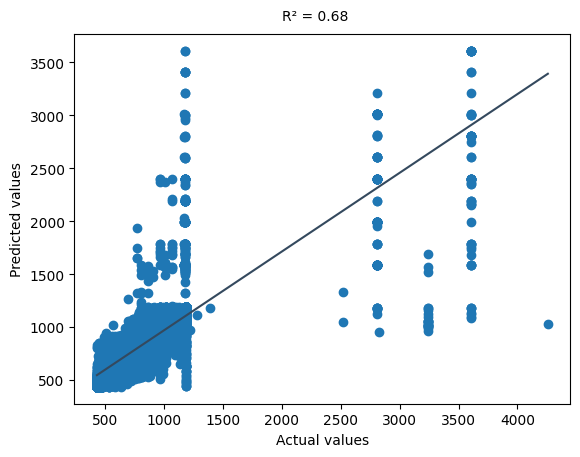

In [79]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_test_pred, 1))(np.unique(y_test)), color="#34495E")
plt.text(2000, 3900, 'R\u00B2 = %0.2f' % r2_score(y_test, y_test_pred))

plt.show()

In [103]:
predicted_df = {'predicted_values': y_test_pred, 'original_values': y_test}
#creating new dataframe
predicted_df=pd.DataFrame(predicted_df).sort_values(by=['original_values'])

In [104]:
predicted_df['error']= ["correct" if row['original_values']==row['predicted_values'] else "incorrect" for index,row in predicted_df.iterrows()]

In [111]:
predicted_df["category"]= predicted_df.original_values.apply(lambda row: categorize(row))

(0.0, 7444.5)

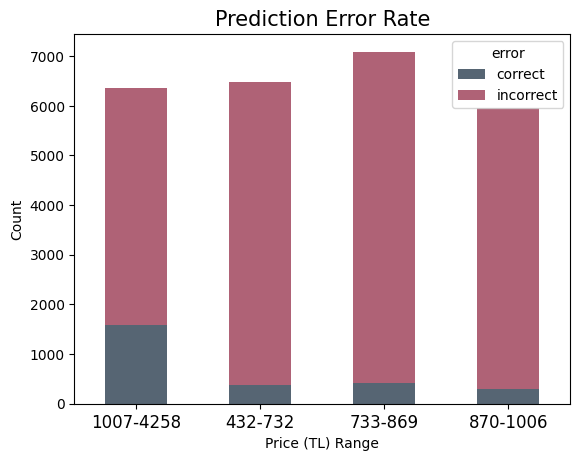

In [115]:
color= ['#566573', '#AF6276']
test = predicted_df.groupby(['category', 'error'])['category'].count().unstack('error').fillna(0)
test.plot(kind='bar', stacked=True, color=color)
plt.title('Prediction Error Rate', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.xlabel("Price (TL) Range")
plt.ylabel("Count")
plt.ylim(0)

### 2) Rigde Regressor

In [119]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [120]:
ridge_regressor.best_params_

{'alpha': 10000}

In [121]:
y_train_pred =ridge_regressor.predict(X_train) ##Predict train result
y_test_pred =ridge_regressor.predict(X_test) ##Predict test result

In [123]:
print("Train Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", round(sqrt(mse(y_train.values, y_train_pred)),2))
print("R-squared: ", round(r2_score(y_train.values, y_train_pred),2))

Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  201.12
R-squared:  0.51


In [124]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", round(sqrt(mse(y_test, y_test_pred)),2))
print("R-squared: ", round(r2_score(y_test, y_test_pred),2))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  196.69
R-squared:  0.52


In [135]:
model_comparison["Ridge Regressor"]=[round(sqrt(mse(y_test, y_test_pred)),2),round(r2_score(y_test, y_test_pred),2)]

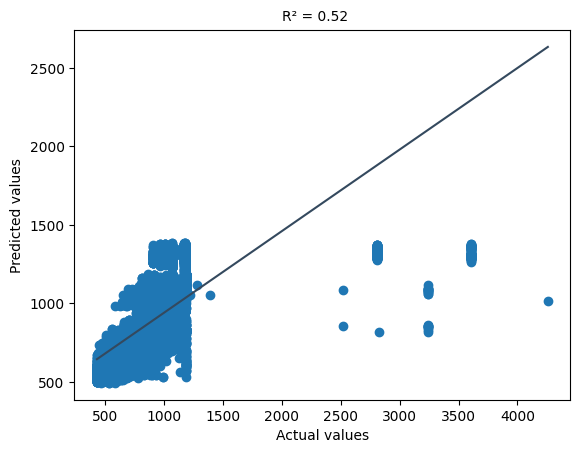

In [143]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_test_pred, 1))(np.unique(y_test)), color="#34495E")
plt.text(2000, 2800, 'R\u00B2 = %0.2f' % r2_score(y_test, y_test_pred))

plt.show()

### 3) Lasso Regressor

In [128]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(X_train ,y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [130]:
lasso_regressor.best_params_

{'alpha': 1}

In [131]:
y_train_pred =lasso_regressor.predict(X_train) ##Predict train result
y_test_pred =lasso_regressor.predict(X_test) ##Predict test result

In [132]:
print("Train Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  200.55425381578655
R-squared:  0.5123869146727027


In [133]:
print("Test Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  196.17032517264028
R-squared:  0.5209247758963074


In [144]:
model_comparison["Lasso Regressor"]=[round(sqrt(mse(y_test, y_test_pred)),2),round(r2_score(y_test, y_test_pred),2)]

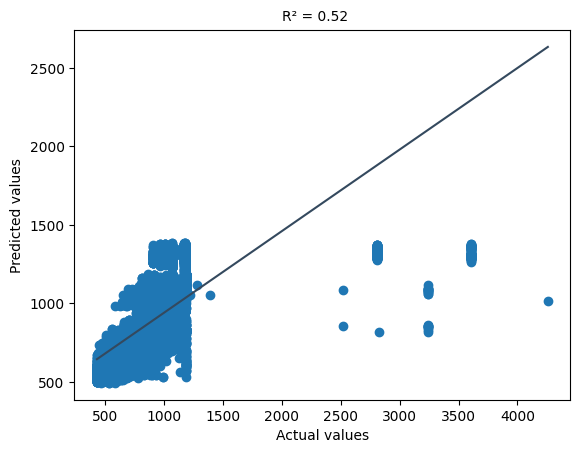

In [145]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_test_pred, 1))(np.unique(y_test)), color="#34495E")
plt.text(2000, 2800, 'R\u00B2 = %0.2f' % r2_score(y_test, y_test_pred))

plt.show()

### 4) Decision Tree Regressor

In [148]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [149]:
tree.best_params_

{'max_depth': 16}

In [150]:
y_train_pred =tree.predict(X_train) ##Predict train result
y_test_pred =tree.predict(X_test) ##Predict test result

In [151]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  45.121454472082064
R-squared:  0.9753181461281649


In [152]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  125.28372294003171
R-squared:  0.8045991771009052


In [153]:
model_comparison["Desicion Tree Regressor"]=[round(sqrt(mse(y_test, y_test_pred)),2),round(r2_score(y_test, y_test_pred),2)]

### 5) Random Forest Regressor

In [ ]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

In [ ]:
random_regressor.best_params_

In [ ]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [ ]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

In [ ]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

In [ ]:
model_comparison["Random Forest Regressor"]=[round(sqrt(mse(y_test, y_test_pred)),2),round(r2_score(y_test, y_test_pred),2)]

### 6) XGBoost Regressor

In [ ]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

In [ ]:
model.best_params_

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
print("Train Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

In [ ]:
print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred)

In [ ]:
model_comparison["XGBoost  Regressor"]=[round(sqrt(mse(y_test, y_test_pred)),2),round(r2_score(y_test, y_test_pred),2)]

## ML Algorithm Comparison

In [ ]:
df_comparison = pd.DataFrame.from_dict(model_comparison).T
df_comparison.columns = ['MSE', 'R2 Score']
df_comparison = df_comparison.sort_values('R2 Score', ascending=True)
df_comparison.style.background_gradient(cmap='Blues')